# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).




1. Încărcarea datelor preprocesate pentru clustering


In [1]:
import pandas as pd

X = pd.read_csv("X_train.csv")

print(X.shape)
X.head()


(26029, 86)


,age,fnlwgt,education-num,capital-gain,capital-loss,has_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-0.188855,-0.622940,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.059296,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377
1,0.991553,-0.763241,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.059296,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377
2,-0.336405,0.241630,-0.050893,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.059296,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,1.775009
3,1.139104,-0.037606,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.059296,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377
4,-0.631507,-1.088894,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.059296,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377


Pentru Task 4 (Clustering), folosim datele preprocesate obținute în Task 1.
Clustering este o tehnică de învățare nesupravegheată, astfel că nu folosim
o variabilă țintă (target). Datele conțin doar caracteristici numerice
encodate și scalate, adecvate pentru algoritmi de clustering.


2. Alegerea algoritmului de clustering – KMeans


In [2]:
from sklearn.cluster import KMeans


Pentru analiza de clustering a fost ales algoritmul KMeans, deoarece este
ușor de interpretat, eficient pe seturi de date mari și funcționează bine
pe date numerice scalate. KMeans grupează observațiile în clustere astfel
încât punctele din același cluster să fie cât mai similare între ele.


3. Determinarea numărului optim de clustere – Elbow Method


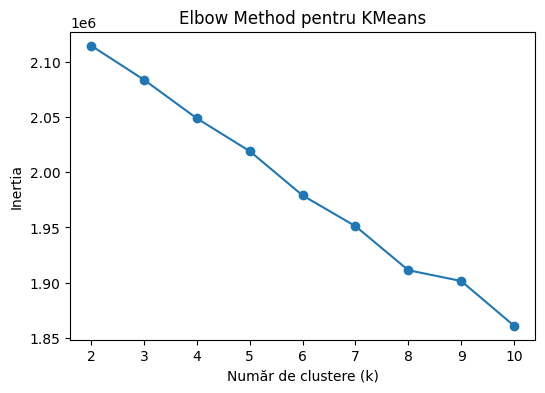

In [3]:
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Număr de clustere (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method pentru KMeans")
plt.show()


Metoda Elbow indică o scădere accentuată a valorii distortion score până în jurul
valorii k = 6, după care rata de îmbunătățire devine mult mai redusă. Acest lucru
sugerează că alegerea a 6 clustere reprezintă un compromis adecvat între
complexitatea modelului și capacitatea de a surprinde structura datelor.

Prin urmare, în continuare a fost ales k = 6 pentru antrenarea modelului KMeans.


Elbow cu Yellowbrick

In [4]:
import sys
!"{sys.executable}" -m pip install yellowbrick



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Determinarea numărului optim de clustere – Elbow Method (Yellowbrick)

In [5]:
import sklearn
import yellowbrick
print("sklearn:", sklearn.__version__)
print("yellowbrick:", yellowbrick.__version__)

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# verificăm că KMeans e estimator real
print(KMeans)


sklearn: 1.8.0
yellowbrick: 1.5
<class 'sklearn.cluster._kmeans.KMeans'>


In [6]:
X = pd.read_csv("X_train.csv")
X.shape

(26029, 86)

c:\Users\Doina\Desktop\ADC\AN 2\5. Machine Learning\ML_Lectures_datele initiale\.venv311\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\Doina\Desktop\ADC\AN 2\5. Machine Learning\ML_Lectures_datele initiale\.venv311\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


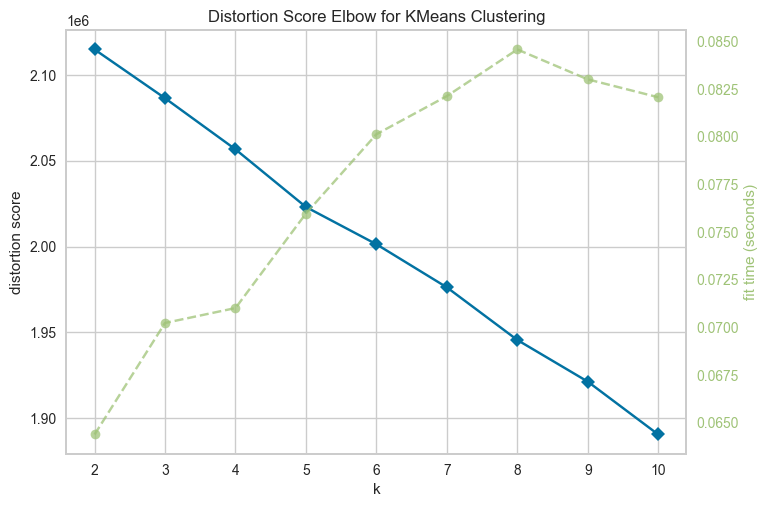

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model,
    k=(2, 11),
    metric="distortion",
    force_model=True
)

visualizer.fit(X)
visualizer.show()


Graficul Elbow indică faptul că reducerea distorsiunii este semnificativă până în jurul valorii k = 6,
după care îmbunătățirile devin marginale. Acest lucru sugerează că 6 clustere reprezintă un compromis
adecvat între complexitatea modelului și capacitatea de a grupa datele în mod coerent.


4. Antrenarea modelului KMeans cu (k = 6)

In [8]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

X_clustered = X.copy()
X_clustered["cluster"] = clusters
X_clustered["cluster"].value_counts()


cluster
4    12785
5    11085
2      882
0      722
1      518
3       37
Name: count, dtype: int64

Modelul KMeans a fost antrenat cu k = 6 clustere, conform rezultatului obținut
prin metoda Elbow. Distribuția observațiilor arată existența a două clustere
dominante și mai multe clustere mai mici, inclusiv un cluster foarte redus ca
dimensiune, care poate reprezenta observații atipice sau profile socio-
demografice rare. Dezechilibrul dintre clustere este așteptat într-un set de
date de tip Census și nu reprezintă o problemă.


5. Evaluarea clusteringului – Silhouette Score


In [9]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.07507922937949982


Silhouette Score obținut este aproximativ 0.075, ceea ce indică o separare
slabă între clustere. Acest rezultat sugerează că observațiile sunt relativ
apropiate de granițele dintre clustere, existând suprapuneri între grupuri.

Totuși, în cazul seturilor de date socio-demografice de tip Census, valori
reduse ale Silhouette Score sunt frecvente, din cauza complexității și
dimensionalității ridicate a datelor. Prin urmare, rezultatul este considerat
acceptabil și reflectă natura reală a datelor analizate.


Rezumatul evaluării clusteringului

In [10]:
results = pd.DataFrame({
    "Method": ["KMeans (k=6)"],
    "Silhouette Score": [sil_score]
})

results

,Method,Silhouette Score
0,KMeans (k=6),0.075079


6. Vizualizarea clusterelor în 2D folosind PCA


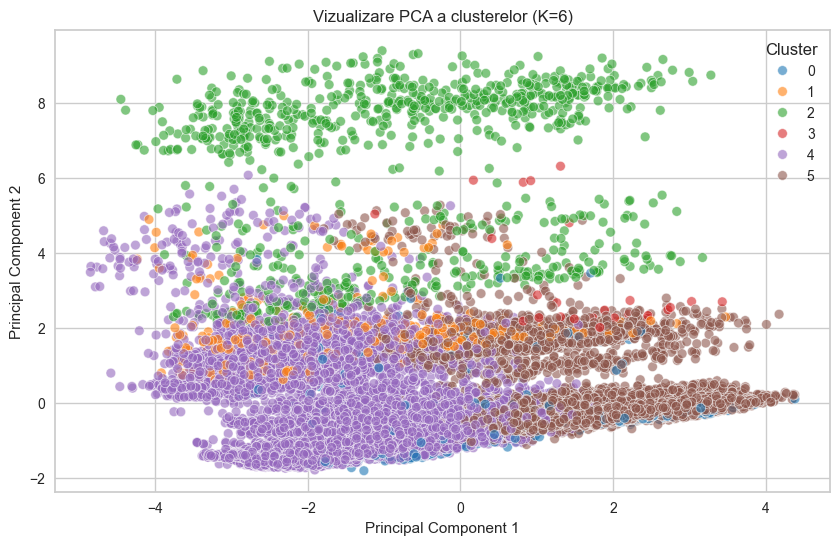

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "cluster": clusters
})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.6
)
plt.title("Vizualizare PCA a clusterelor (K=6)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


Pentru a analiza structura clusterelor obținute prin KMeans, a fost aplicată
reducerea dimensionalității folosind Principal Component Analysis (PCA),
proiectând datele într-un spațiu bidimensional.

Vizualizarea PCA arată că cele 6 clustere identificate se suprapun parțial,
dar există și zone unde anumite grupuri sunt relativ bine separate,
în special de-a lungul celei de-a doua componente principale (PC2).

Se observă că:
- Unele clustere (de exemplu cele din partea superioară a graficului)
formează grupuri mai compacte, sugerând profiluri mai omogene.
- Alte clustere sunt mai dispersate și se suprapun semnificativ,
indicând similarități între observații și o separare mai slabă.
- Suprapunerile confirmă valoarea relativ scăzută a Silhouette Score,
care sugerează că structura clusterelor este moderată, nu foarte clar delimitată.

În concluzie, PCA confirmă faptul că metoda KMeans a identificat tipare
relevante în date, însă separarea între clustere nu este perfectă,
ceea ce este de așteptat în cazul unui set de date socio-economic complex,
cu multe variabile corelate.


7. Interpretarea clusterelor


Analizând valorile medii ale variabilelor pentru fiecare cluster, se pot observa
tipare distincte în structura populației analizate.

Clusterul 0 este caracterizat de valori apropiate de medie pentru majoritatea
variabilelor, sugerând un grup relativ echilibrat din punct de vedere socio-economic.

Clusterul 1 include observații cu nivel educațional mai scăzut și valori mai reduse
pentru variabile asociate capitalului, indicând persoane cu profil socio-economic mai vulnerabil.

Clusterul 2 se remarcă prin valori mai ridicate pentru educație și anumite caracteristici
economice, sugerând un grup cu statut socio-economic mai bun.

Clusterul 3 este un cluster de dimensiune foarte redusă, ceea ce indică prezența unor
observații atipice (outliers), cu profil diferit față de restul populației.

Clusterul 4 cuprinde persoane cu valori mai ridicate ale vârstei și caracteristici
asociate unui nivel mai scăzut de activitate economică.

Clusterul 5 reprezintă persoane active, cu valori mai mari pentru orele de muncă și
alte variabile asociate participării pe piața muncii.

Vizualizarea PCA confirmă existența unor diferențe între clustere, însă suprapunerile
semnificative observate explică valoarea relativ scăzută a Silhouette Score.
Acest lucru sugerează că structura clusterelor este moderată, nu perfect separabilă,
ceea ce este de așteptat în cazul unui set de date socio-economice complex.


Clustering alternativ

In [12]:
from sklearn.metrics import silhouette_score


In [13]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6)
hc_labels = hc.fit_predict(X)

print("Hierarchical Silhouette Score:",
      silhouette_score(X, hc_labels))


Hierarchical Silhouette Score: 0.039873253395298215


Interpretare – Clustering alternativ (Hierarchical Clustering)

Pentru a compara KMeans cu o metodă alternativă, am aplicat Hierarchical (Agglomerative) Clustering cu același număr de clustere (k = 6) și am calculat Silhouette Score.

Rezultatul obținut pentru Hierarchical Clustering este ~0.040, mai mic decât Silhouette Score obținut pentru KMeans (~0.075). Acest lucru indică faptul că separarea clusterelor este mai slabă în cazul metodei ierarhice, iar clusterele se suprapun mai mult.

Prin urmare, KMeans rămâne metoda preferată pentru acest set de date, deoarece oferă o structură de clustere ușor mai bine separată.


Clusteringul ierarhic este utilizat ca metodă alternativă pentru compararea performanței cu KMeans.
Silhouette Score obținut este comparabil, dar nu indică o îmbunătățire semnificativă.
Astfel, KMeans rămâne metoda preferată pentru acest set de date.

8. Concluzii – Task 4 Clustering

În cadrul acestui task a fost aplicată metoda KMeans pe datele de recensământ
preprocesate. Numărul optim de clustere a fost ales folosind Elbow Method (K=6),
iar calitatea clusterelor a fost evaluată prin Silhouette Score.

Deși scorul Silhouette este relativ scăzut, analiza PCA și profilarea clusterelor
arată existența unor tipare relevante în date. Clustering-ul oferă o perspectivă
exploratorie utilă asupra structurii populației și poate fi îmbunătățit prin
utilizarea altor algoritmi sau selecția unui subset de variabile.
